# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from __future__ import division

df = pd.read_csv('data/human_body_temperature.csv')

/Users/faisalmahmood/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.shape

(130, 3)

In [4]:
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

In [5]:
np.sqrt(len(df))

11.401754250991379

In [6]:
temps = df.temperature

# *1) Is the distribution of body temperatures normal?*

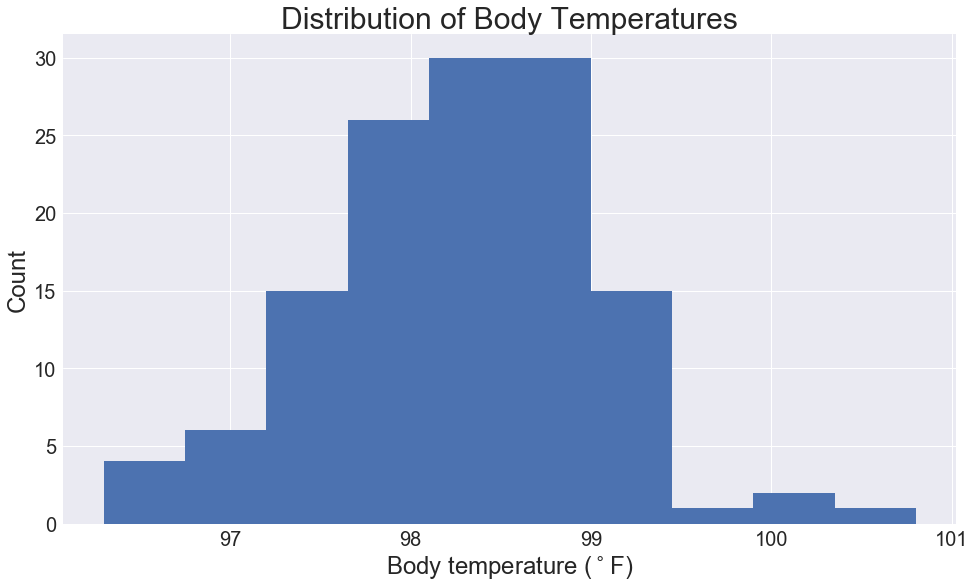

In [7]:
sns.set(font_scale = 2)
_ = plt.rcParams['figure.figsize'] = [16, 9]
_ = plt.hist(temps)
_ = plt.xlabel('Body temperature ($^\circ$F)', fontsize = 24)
_ = plt.ylabel('Count', fontsize = 24)
_ = plt.title('Distribution of Body Temperatures', fontsize = 30)

_ = plt.show()

**Based on the above histogram, the distribution of body temperatures appears to be close to normal. Further analysis will be done to test the normality of this distribution.**

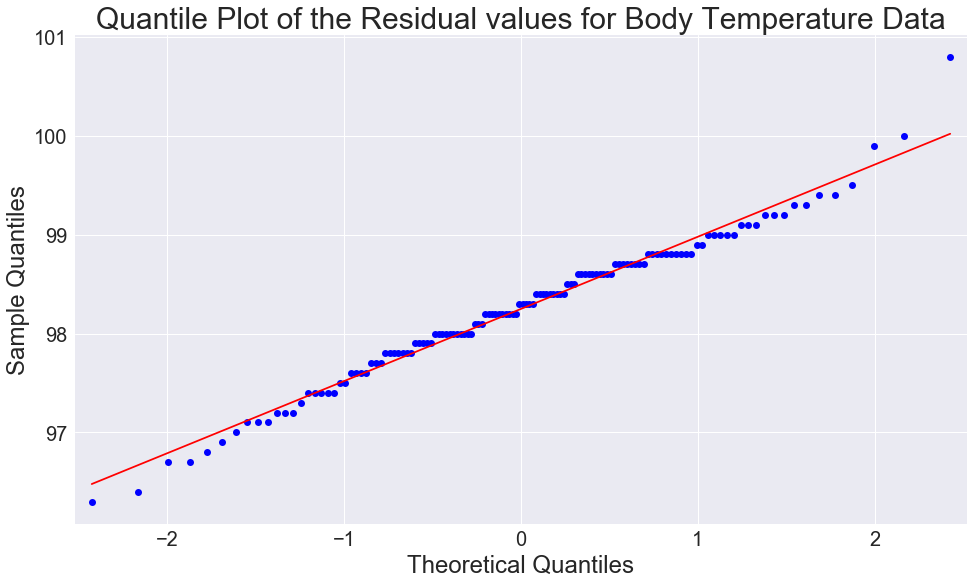

In [8]:
_ = sm.qqplot(temps, line = 's')
_ = plt.title('Quantile Plot of the Residual values for Body Temperature Data', fontsize = 30)
_ = plt.xlabel("Theoretical Quantiles", fontsize = 24)
_ = plt.ylabel("Sample Quantiles", fontsize = 24)
_ = plt.show()

**The quantile plot (also known as the quantile-quantile plot, or Q-Q plot) of the data appears to show a mostly smooth and predictable progression of the residuals, with the possible exceptions of the tail ends. If the data is normally distributed, then its quantile plot will appear as a straight line. **

**This plot is further evidence of the data having a distribution close to normal.**

In [9]:
t_mean = np.mean(temps)
print t_mean

98.2492307692


In [10]:
t_std = np.std(temps)
print t_std

0.730357778905


In [11]:
np.random.seed(42)
t_samples = np.random.normal(t_mean, t_std, size = 10000)

In [12]:
def ecdf(data):
    """Calcluates the Empirical Cumulative Distribution Function (ECDF) for an array of values"""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    
    return x, y

In [13]:
x_samp, y_samp = ecdf(t_samples)
x, y = ecdf(temps)

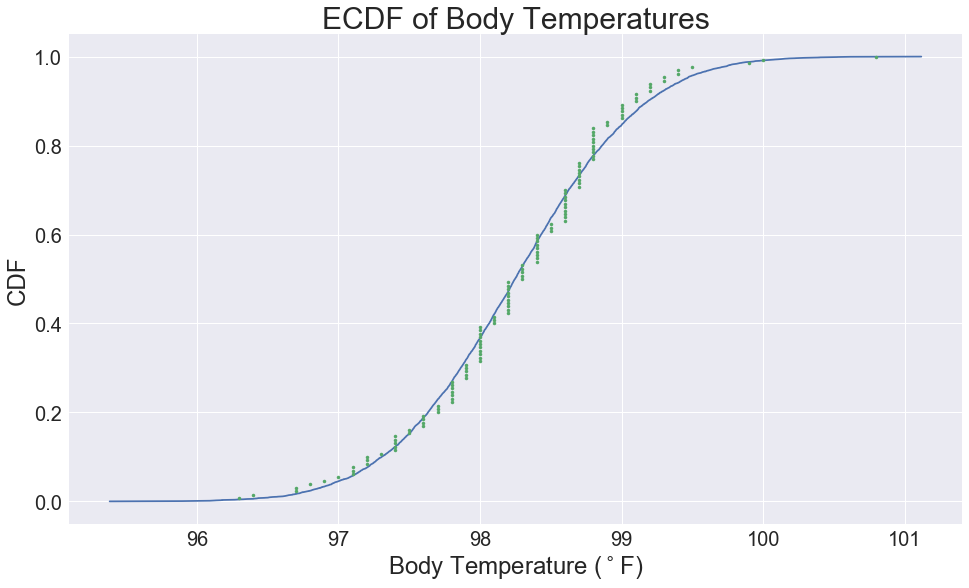

In [14]:
_ = plt.plot(x_samp, y_samp)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('ECDF of Body Temperatures', fontsize = 30)
_ = plt.xlabel('Body Temperature ($^\circ$F)', fontsize = 24)
_ = plt.ylabel('CDF', fontsize = 24)

_ = plt.show()

**The Empirical Cumulative Distribution Function (ECDF) of the data has been plotted above, and it shows the cumulative distribution of the body temperature data, plotted alongside a smooth curve representing a normally distributed random sample of data that was given the same mean and standard deviation as the actual body temperature data. **

**The data seems to closely follow the normally distributed curve, so the above plot is further evidence of the body temperature data having a normal distribution.**

In [15]:
stat, p = stats.shapiro(temps)
print 'Shapiro-Wilks Test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''

alpha = 0.05
if p > alpha:
    print('At α = 0.05, the data appears normally distributed, so the null hypothesis should not be rejected.')
else:
    print('At α = 0.05, the data does not appear normally distributed. Reject the null hypothesis.')

Shapiro-Wilks Test result:
Test statistic = 0.987, p-value = 0.233

At α = 0.05, the data appears normally distributed, so the null hypothesis should not be rejected.


**The Shapiro-Wilk test was done on the temperature data to determine whether it is normally distributed. This particular test tends to be effective with relatively small sample sizes, and since the set contains 130 values, the Shapiro-Wilk test seemed to be a reliable option. **

**A $\alpha$ = 0.05, the result of the test was a p-value of 0.233, which suggests that the null hypothesis (which assumes a normal, Gaussian distribution) should not be rejected. Therefore, the data can be assumed to have a normal distribution.**

# *2) Is the sample size large? Are the observations independent?*

**The dataset contains 130 observations, which is large enough for the Central Limit Theorum to be applicable. As a rule of thumb, if samples are taken from a dataset, and then averaged, the sample size should be at least n = 30 for the CLT to be effective. If the observations of original dataset are already normally distributed (which is the case with this assignment's dataset), then even a smaller sample size would be sufficient. **

**The observations in this dataset are independent, because each observation consists of an individual person's data, and no one observation provides any information about what another observation will show.**

# *3) Is the true population mean really 98.6 degrees F?*

- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the $t$ or $z$ statistic? 
- Now try using the other test. How is the result be different? Why?


**For the bootstrap hypothesis test, the null hypothesis will be the assumption that there is no statistically significant difference between the mean temperature of the dataset (98.2&deg;F) and the assumed population mean temperature (98.6&deg;F). **

**The values of the dataset will be shifted to so that its mean matches the assumed population mean of 98.6&deg;F. And then, with that shifted dataset, the bootstrap hypothesis test will generate 10,000 samples of simulated data under the assumption that the null hypothesis is true, and the test statistic will be defined as the bootstrap replicate mean. Since the assumed population mean temperature is higher than the sample mean from the dataset, the p-value will be the percentage of bootstrap samples whose mean is at least as low as the original sample mean, and that value will determine whether the null hypothesis should be rejected. The value of $\alpha$ will be set to 0.05.**

In [16]:
# Shifting temp data to match given population mean
pop_mean = 98.6 # degrees F
temps_shifted = temps - np.mean(temps) + pop_mean

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
 # Initialize array of bootstrap replicates
    bs_replicates = np.empty(shape=size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [18]:
bs_replicates = draw_bs_reps(temps_shifted, np.mean, size = 10000)

In [19]:
p = np.sum(bs_replicates <= np.mean(temps))/len(bs_replicates)

In [20]:
print 'Bootstrap hypothesis test:' 
print 'p-value = ', p
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the sample mean temperature and population mean can be found.')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.')
    print('Reject the null hypothesis.')

Bootstrap hypothesis test:
p-value =  0.0

At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.
Reject the null hypothesis.


In [21]:
np.sum(bs_replicates <= np.mean(temps))

0

** Based on the above bootstrap hypothesis test, a statistically significant difference between the given population mean and the mean derived from the dataset has been found. As shown above, not a single bootstrap replicate mean was equal to or lower than the original sample mean. As a result, the p-value is 0, and the null hypothesis can be rejected. **

*****

**In the frequentist test, a one-sample test would be done, because a single sample is being tested against a population mean. A two-sample test would be used to test two sample means, either between two different groups, or within a single group under two different circumstances. Those conditions do not apply to this problem.**

**In this situation, the t-statistic is the appropriate choice, because the standard error of the z-statistic cannot be figured out, since that requires knowing the population standard deviation of the human body temperature in the context of this assignment. For a problem involving proportions, the z-statistic would be a much more reliable choice, since the standard error can be easily calculated. Once again, $\alpha$ is set to 0.05.**

**The following one-sample t-test will test the dataset against the population mean temperature: **

In [22]:
np.random.seed(42)
stat, p = stats.ttest_1samp(temps, 98.6)
print 'One-sample t-test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the sample mean temperature and population mean can be found')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.')
    print('Reject the null hypothesis.')

One-sample t-test result:
Test statistic = -5.455, p-value = 0.000

At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.
Reject the null hypothesis.


**For the sake of comparison, here is the z-test, also with $\alpha$ set to 0.05:**

In [23]:
np.random.seed(42)
from statsmodels.stats.weightstats import ztest
stat, p = ztest(x1=temps, value= 98.6, alternative= 'two-sided', ddof=1.0)
print 'One-sample z-test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the sample mean temperature and population mean can be found.')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.')
    print('Reject the null hypothesis.')

One-sample z-test result:
Test statistic = -5.455, p-value = 0.000

At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.
Reject the null hypothesis.


**The z-test and t-test had very similar results, most likely because the sample size of the dataset was large enough for the sample standard deviation to be used as a decent approximation of the population standard deviation.**

**All of the above tests suggest a statistically significant difference between the sample mean temperature and the population mean. The null hypothesis can be rejected.**

# *4) Draw a small sample of size 10 from the data and repeat both frequentist tests.*

- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  $t$  and  $z$  statistic?


**The correct test to use would be the t-test, for the same reason as the previous problem. A sample mean is being tested against the population mean, without a known population standard deviation. However, this time, the sample size is much smaller, so the differences between the tests may matter more. Again, $\alpha$ is set to 0.05.**

In [24]:
np.random.seed(42)
temps_sample = np.random.choice(temps, 10)
temps_sample

array([ 98. ,  98.8,  97.8,  97. ,  97.7,  98.3,  98. ,  97.9,  99. ,  98. ])

In [25]:
np.random.seed(42)
stat, p = stats.ttest_1samp(temps_sample, 98.6)
print 'One-sample t-test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the sample mean temperature and population mean can be found.')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.')
    print('Reject the null hypothesis.')

One-sample t-test result:
Test statistic = -3.093, p-value = 0.013

At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.
Reject the null hypothesis.


In [26]:
np.random.seed(42)
from statsmodels.stats.weightstats import ztest
stat, p = ztest(x1=temps_sample, value= 98.6, alternative= 'two-sided', ddof=1.0)
print 'One-sample z-test result:' 
print 'Test statistic = %.3f, p-value = %.3f' % (stat, p) 
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the sample mean temperature and population mean can be found.')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.')
    print('Reject the null hypothesis.')

One-sample z-test result:
Test statistic = -3.093, p-value = 0.002

At α = 0.05, a statistically significant difference between the sample mean and the population mean appears to exist.
Reject the null hypothesis.


**This time, the t-test and z-test resulted in a nearly identical test statistic, but while the p-values were low enough to reject the null hypothesis, they were noticably higher than the p-values from the previous problem, due to the smaller sample size. The p-values also noticably differed between the t-test and the z-test, which shows that when the sample size is this small, t-distribution and z-distribution can have meaningful differences. With such a small sample size, the sample standard deviation should not be used as an approximation of the population standard deviation.**

# * 5) At what temperature should we consider someone's temperature to be "abnormal"?*

<li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

**This will require the calculation of a confidence interval, using both the bootstrap and frequentist methods. The bootstrap replicates function from problem 3) will be used to form a 95% confidence interval based on bootstrap replicates derived from the dataset.**

In [27]:
np.random.seed(42)
bs_replicates_set = draw_bs_reps(temps, np.mean, size = 10000)
bootstrap_conf_int = np.percentile(bs_replicates_set, [2.5, 97.5])
print 'Bootstrap 95% confidence interval =', bootstrap_conf_int, '°F'
print 'Margin of error = +/-', (bootstrap_conf_int[1] - bootstrap_conf_int[0])/2, '°F'

Bootstrap 95% confidence interval = [ 98.12461538  98.37384615] °F
Margin of error = +/- 0.124615384615 °F


**According to the 95% confidence interval that was derived from the bootstrap method as applied to the dataset, any body temperature under 98.12°F or above 98.37°F can be considered abnormal. The true population mean (98.6°F) falls outside of this interval. The margin of error, which is derived from dividing the range of the confidence interval by 2, is +/- 0.1246°F. ** 

In [28]:
np.random.seed(42)
freq_conf_int = stats.t.interval(alpha = 0.95, df= 129, loc = t_mean, scale = t_std/np.sqrt(len(temps)))
print 'Frequentist: 95% confidence interval =', freq_conf_int, '°F body temperature'
print 'Margin of error = +/-', (freq_conf_int[1] - freq_conf_int[0])/2, '°F'

Frequentist: 95% confidence interval = (98.12249318821641, 98.375968350245145) °F body temperature
Margin of error = +/- 0.126737581014 °F


 **According to the 95% confidence interval that was derived from the frequentist method as applied to the dataset, any body temperature under 98.12°F or above 98.38°F can be considered abnormal. The margin of error is +/- 0.1267°F. **

# * 6) Is there a significant difference between males and females in normal temperature?*

- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

** The bootstrap method will be used, and a two-sample hypothesis test will be conducted to determine whether there is a significant difference between the normal temperatures of males and females. This test will be done because it is an efficient way of simulating the collection of even more data, so that the null hypothesis (which assumes that the true mean temparature is equal between both genders) can be tested. **

**The test statistic is the difference in mean temperatures between the genders. This particular test will simulate how often the test statistic of the bootstrap replicates is at least as extreme as the original difference of mean temperatures between the genders, under the assumption that the null hypothesis is true. This will be the basis for the p-value, with $\alpha$ being set to 0.05.**

In [29]:
females = df.loc[df['gender'] == 'F']
females = females.temperature

In [30]:
males = df.loc[df['gender'] == 'M']
males = males.temperature

In [31]:
diff_means = np.mean(males) - np.mean(females)
mean_count = np.mean(df.temperature)
males_shifted = males - np.mean(males) + mean_count
females_shifted = females - np.mean(females) + mean_count

In [32]:
bs_reps_males = draw_bs_reps(males_shifted,
                       np.mean, size=10000)
bs_reps_females = draw_bs_reps(females_shifted,
                       np.mean, size=10000)
bs_replicates = bs_reps_males - bs_reps_females

p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
print 'Bootstrap two-sample hypothesis test:'
print 'p-value =', p
print ''
alpha = 0.05
if p > alpha:
    print('At α = 0.05, no statistically significant difference between the mean temperature between males and females can be found.')
    print('The null hypothesis should not be rejected.')
else:
    print('At α = 0.05, a statistically significant difference between the mean temperature between males and females appears to exist.')
    print('Reject the null hypothesis.')

Bootstrap two-sample hypothesis test:
p-value = 0.9892

At α = 0.05, no statistically significant difference between the mean temperature between males and females can be found.
The null hypothesis should not be rejected.


** The p-value is 0.9883, which means that the vast majority of bootstrap replicates had a test statistic more extreme than the original difference in temperature means from the dataset. Therefore, the null hypothesis should not be rejected, and not enough evidence exists to suggest a statistically significant difference in temperature based on gender. **